COMPREHENSIVE TIME SERIES ANALYSIS
Loading demographic data...
✓ Loaded 692,541 rows from demographic data

TIME SERIES ANALYSIS PREPARATION
Years available: [2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Total patient-year observations: 65,627
Total unique patients: 63,421

DEMOGRAPHIC VARIABLE TIME SERIES ANALYSIS

1. PATIENT VOLUME TRENDS
----------------------------------------
 Year  Patient_Count  Growth_Rate_Pct
 2001            661              NaN
 2002            688             4.08
 2003           2163           214.39
 2004           2414            11.60
 2005           2666            10.44
 2006           2628            -1.43
 2007           2393            -8.94
 2008           2516             5.14
 2009           2331            -7.35
 2010           1694           -27.33
 2011           1947            14.94
 2012           2227            14.38
 2013           2435         

<Figure size 1400x600 with 0 Axes>

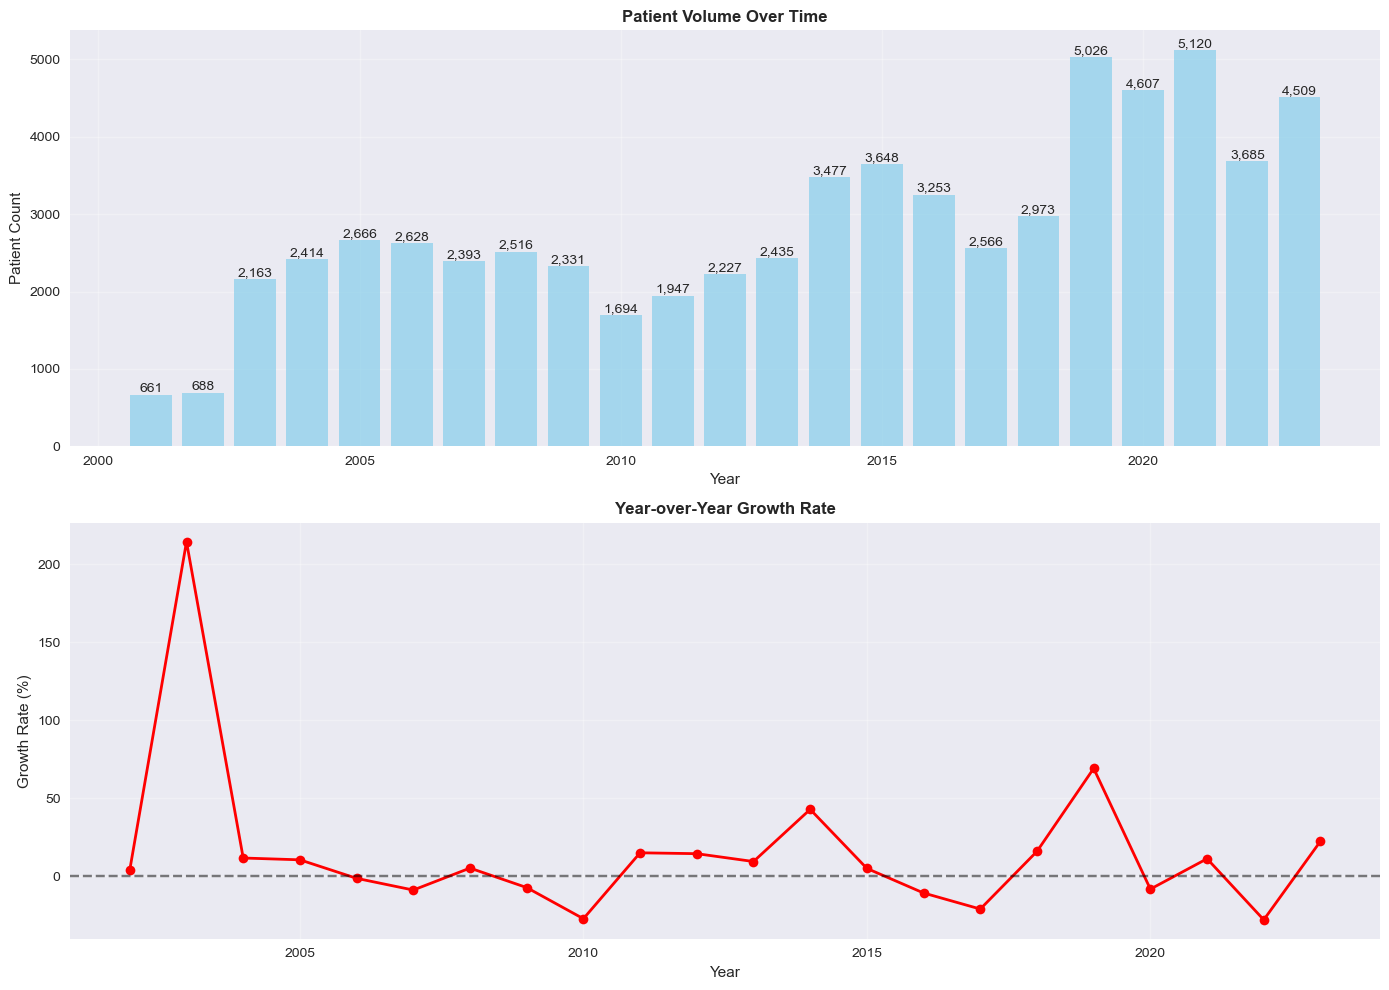

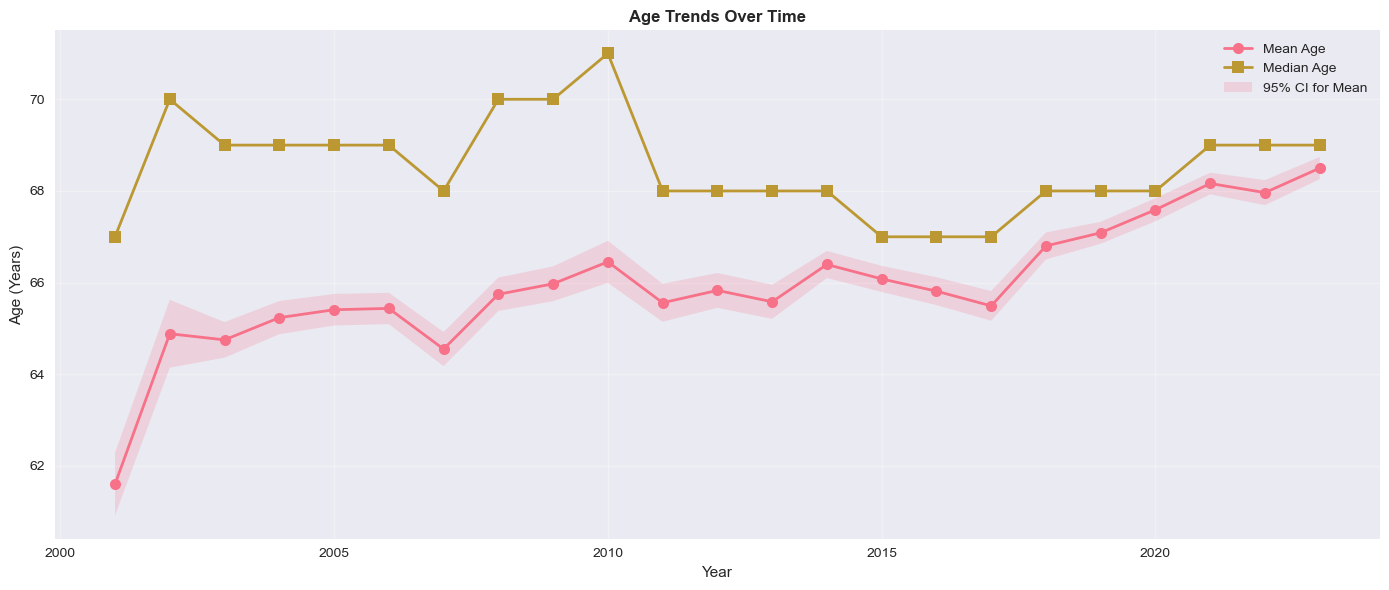

<Figure size 1400x600 with 0 Axes>

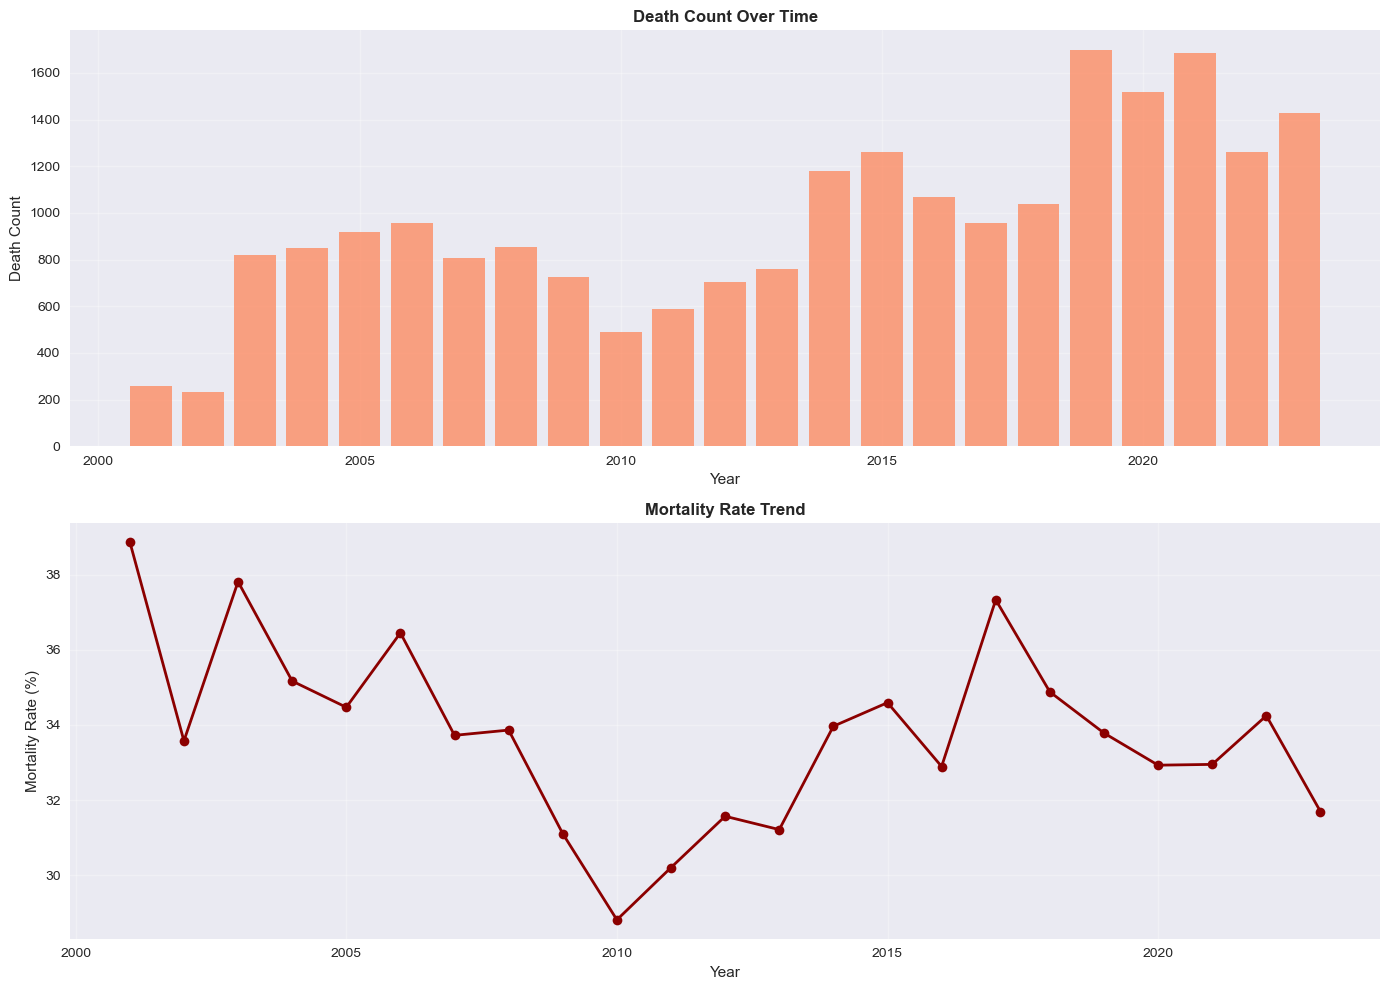

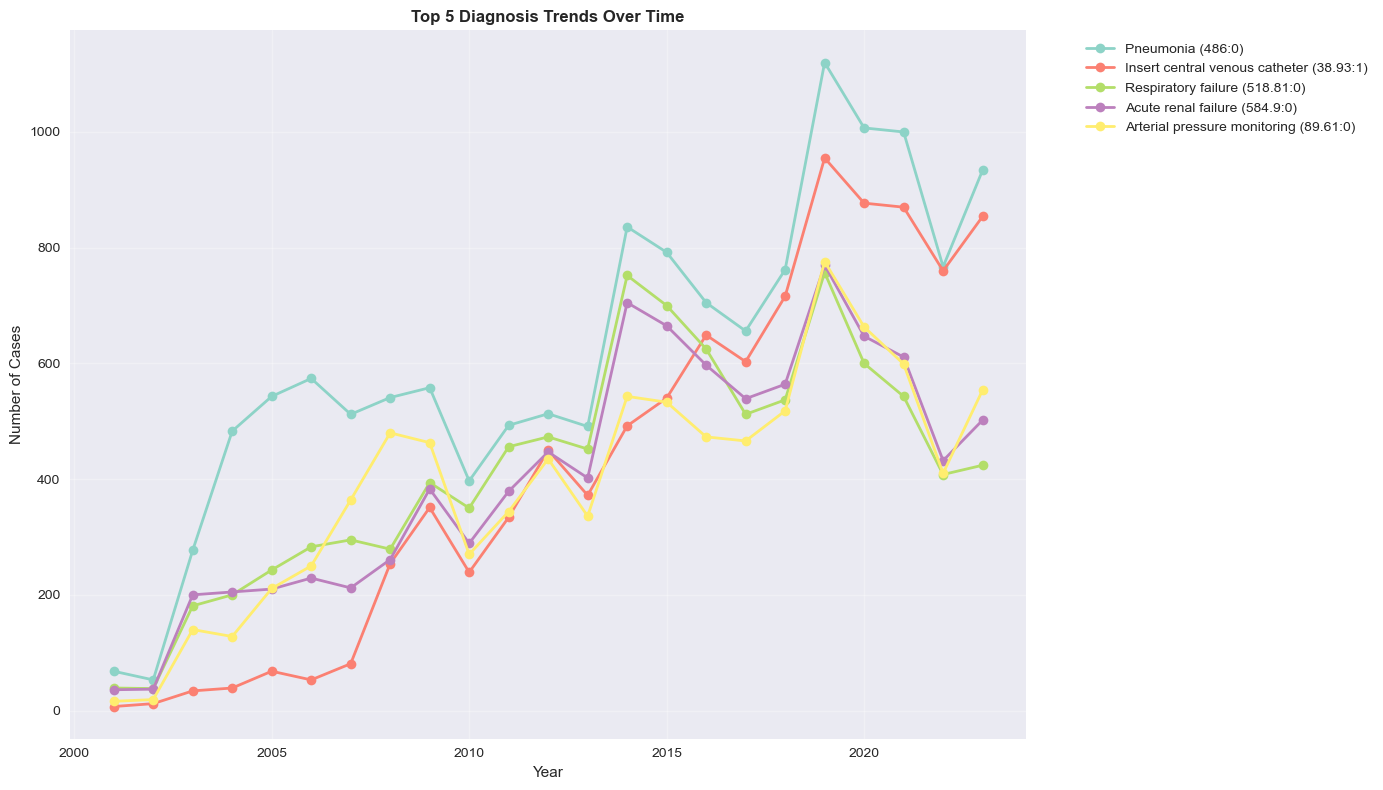


Creating composite trend dashboard...


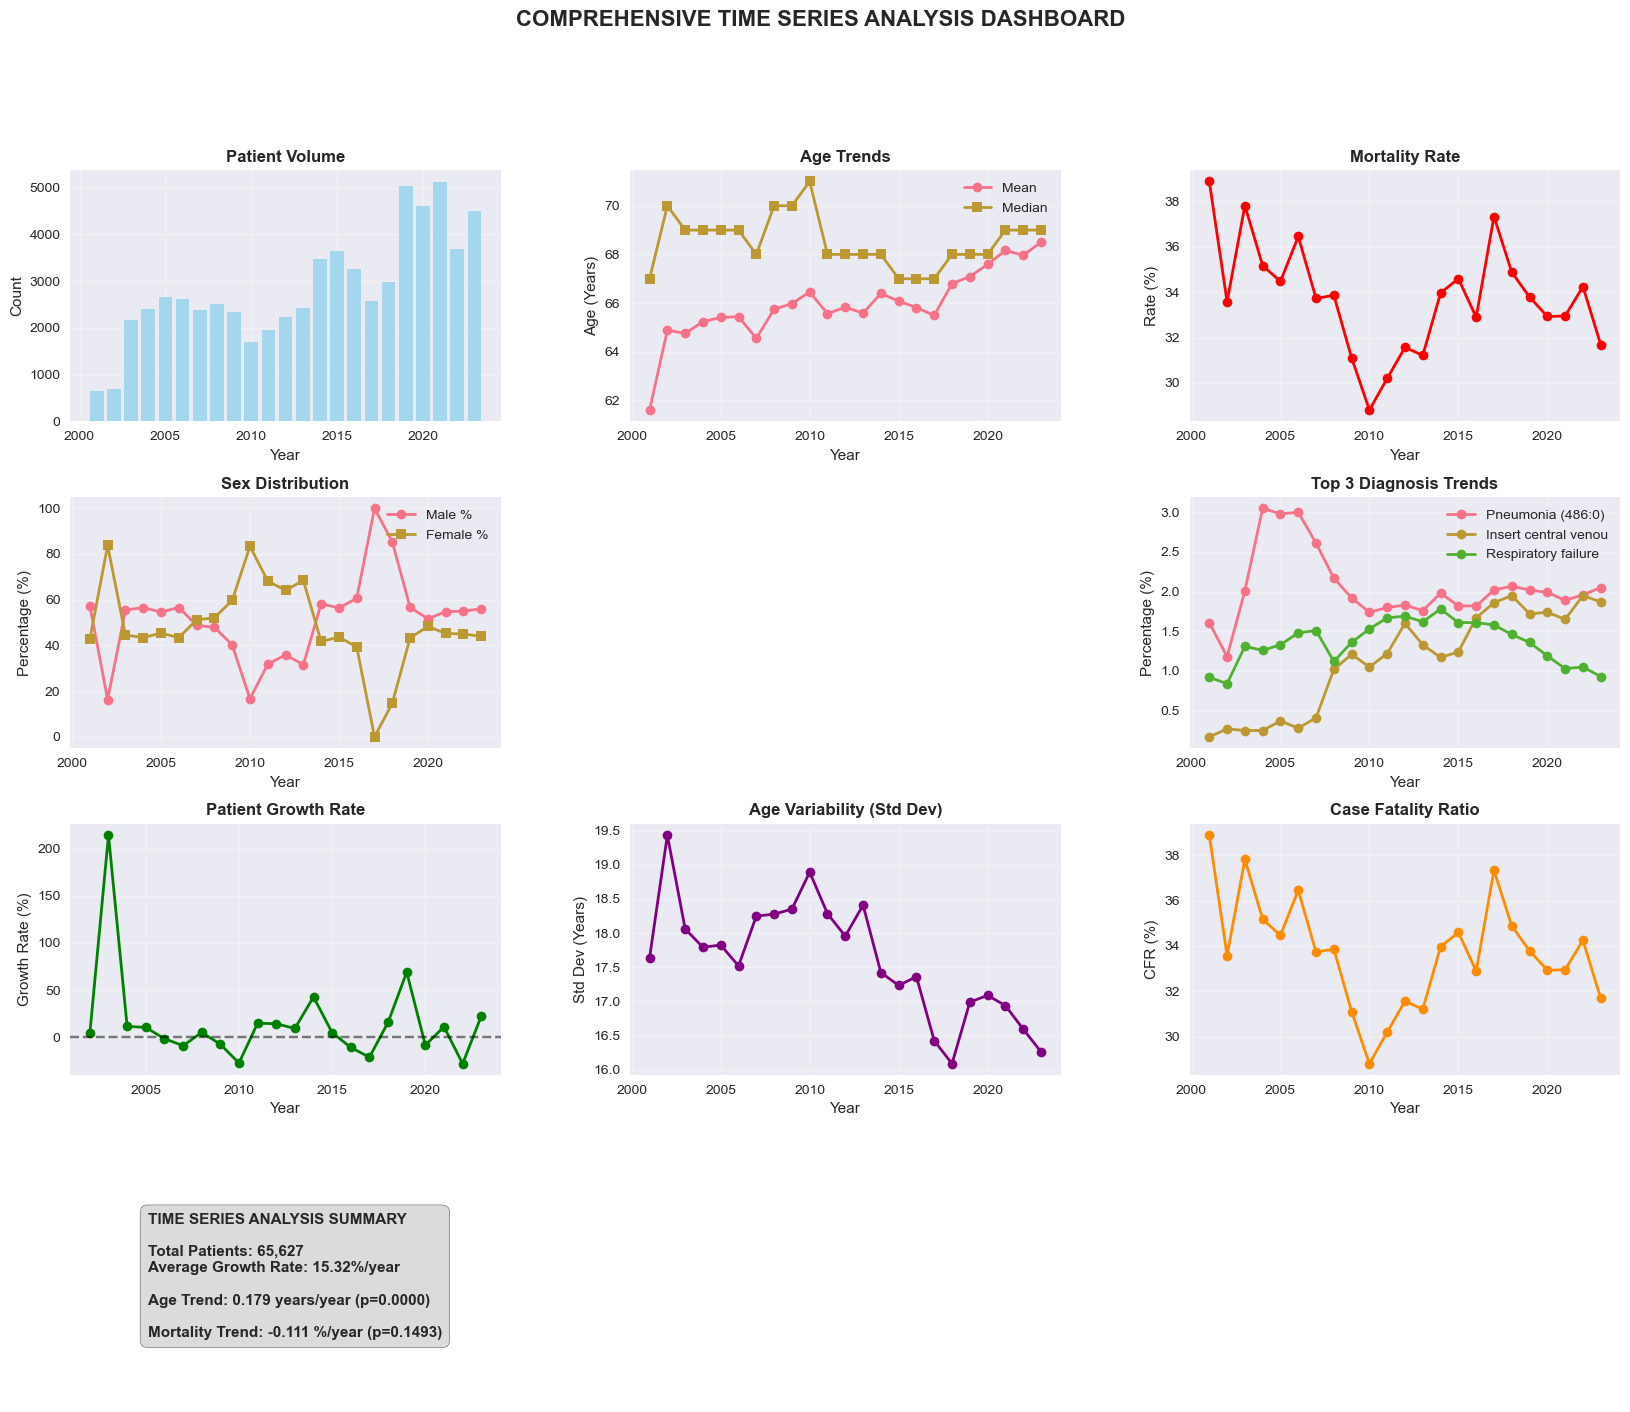


SAVING TIME SERIES DATA
✓ Patient Volume: ./Sepsis_plt/demographic/filtered_approved_hn/time_series_analysis/patient_volume_trend.csv
✓ Age: ./Sepsis_plt/demographic/filtered_approved_hn/time_series_analysis/age_trend.csv
✓ Sex: ./Sepsis_plt/demographic/filtered_approved_hn/time_series_analysis/sex_trend.csv
✓ Mortality: ./Sepsis_plt/demographic/filtered_approved_hn/time_series_analysis/mortality_trend.csv
✓ Race: ./Sepsis_plt/demographic/filtered_approved_hn/time_series_analysis/race_trend.csv
✓ Diagnosis Trends: ./Sepsis_plt/demographic/filtered_approved_hn/time_series_analysis/diagnosis_trends.csv
✓ Main Causes: ./Sepsis_plt/demographic/filtered_approved_hn/time_series_analysis/main_causes_trends.csv
✓ Supplementary Causes: ./Sepsis_plt/demographic/filtered_approved_hn/time_series_analysis/supplementary_causes_trends.csv

ANALYSIS COMPLETE
✓ Time series analysis for all variables completed
✓ Statistical trends calculated with p-values
✓ Multiple visualizations created
✓ All data sa

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

def load_demographic_data():
    """Load the filtered demographic data"""
    input_file = "./Sepsis_plt/demographic/filtered_approved_hn/demographic_ALL_YEARS_filtered.csv"
    
    if not os.path.exists(input_file):
        print(f"Error: Filtered demographic file not found at {input_file}")
        return None
    
    print("Loading demographic data...")
    try:
        df = pd.read_csv(input_file)
        print(f"✓ Loaded {len(df):,} rows from demographic data")
        return df
    except Exception as e:
        print(f"✗ Error loading demographic data: {e}")
        return None

def get_unique_patients_by_year(df):
    """Get unique patients by Reference Key AND Year"""
    if 'Reference Key' not in df.columns or 'Year' not in df.columns:
        return df
    return df.drop_duplicates(subset=['Reference Key', 'Year'])

def prepare_time_series_data(df):
    """Prepare data for time series analysis"""
    unique_df = get_unique_patients_by_year(df)
    years = sorted(unique_df['Year'].unique())
    
    print(f"\n" + "="*80)
    print("TIME SERIES ANALYSIS PREPARATION")
    print("="*80)
    print(f"Years available: {years}")
    print(f"Total patient-year observations: {len(unique_df):,}")
    print(f"Total unique patients: {df['Reference Key'].nunique():,}")
    
    return unique_df, years

def analyze_demographic_trends(unique_df, years):
    """Analyze demographic variable trends over time"""
    print("\n" + "="*80)
    print("DEMOGRAPHIC VARIABLE TIME SERIES ANALYSIS")
    print("="*80)
    
    # Create output folder
    output_folder = "./Sepsis_plt/demographic/filtered_approved_hn/time_series_analysis/"
    os.makedirs(output_folder, exist_ok=True)
    
    # Initialize storage for all trends
    all_trends = {}
    
    # 1. PATIENT VOLUME TRENDS
    print("\n1. PATIENT VOLUME TRENDS")
    print("-" * 40)
    
    patient_counts = []
    for year in years:
        year_data = unique_df[unique_df['Year'] == year]
        patient_counts.append(len(year_data))
    
    # Calculate growth rates
    patient_series = pd.Series(patient_counts, index=years)
    growth_rates = patient_series.pct_change() * 100
    
    volume_df = pd.DataFrame({
        'Year': years,
        'Patient_Count': patient_counts,
        'Growth_Rate_Pct': growth_rates.round(2)
    })
    
    print(volume_df.to_string(index=False))
    
    # Test for trend (linear regression)
    slope, intercept, r_value, p_value, std_err = stats.linregress(years, patient_counts)
    print(f"\nLinear trend test for patient volume:")
    print(f"  Slope: {slope:.2f} patients/year")
    print(f"  R-squared: {r_value**2:.3f}")
    print(f"  P-value: {p_value:.4f}")
    print(f"  Significant trend: {'YES' if p_value < 0.05 else 'NO'}")
    
    all_trends['patient_volume'] = volume_df
    
    # 2. AGE TRENDS
    print("\n2. AGE TRENDS")
    print("-" * 40)
    
    age_stats = []
    for year in years:
        year_data = unique_df[unique_df['Year'] == year]
        age_data = year_data['Admission Age (Year) (episode based)'].dropna()
        
        if len(age_data) > 0:
            stats_dict = {
                'Year': year,
                'Mean_Age': age_data.mean(),
                'Median_Age': age_data.median(),
                'Std_Age': age_data.std(),
                'Min_Age': age_data.min(),
                'Max_Age': age_data.max(),
                'Count': len(age_data)
            }
            age_stats.append(stats_dict)
    
    age_df = pd.DataFrame(age_stats)
    
    # Test for age trend
    slope_mean, _, r_mean, p_mean, _ = stats.linregress(age_df['Year'], age_df['Mean_Age'])
    slope_median, _, r_median, p_median, _ = stats.linregress(age_df['Year'], age_df['Median_Age'])
    
    print(f"Mean age trend: {slope_mean:.3f} years/year (p={p_mean:.4f})")
    print(f"Median age trend: {slope_median:.3f} years/year (p={p_median:.4f})")
    
    all_trends['age'] = age_df
    
    # 3. SEX DISTRIBUTION TRENDS
    print("\n3. SEX DISTRIBUTION TRENDS")
    print("-" * 40)
    
    sex_trends = []
    for year in years:
        year_data = unique_df[unique_df['Year'] == year]
        sex_data = year_data['Sex'].astype(str).str.strip().str.upper()
        
        male_count = len(sex_data[sex_data.isin(['M', 'MALE', '1'])])
        female_count = len(sex_data[sex_data.isin(['F', 'FEMALE', '2'])])
        total = len(sex_data)
        
        male_pct = (male_count / total * 100) if total > 0 else 0
        female_pct = (female_count / total * 100) if total > 0 else 0
        
        sex_trends.append({
            'Year': year,
            'Male_Count': male_count,
            'Female_Count': female_count,
            'Male_Pct': male_pct,
            'Female_Pct': female_pct,
            'Total': total
        })
    
    sex_df = pd.DataFrame(sex_trends)
    
    # Test for sex ratio trend
    slope_sex, _, r_sex, p_sex, _ = stats.linregress(sex_df['Year'], sex_df['Male_Pct'])
    print(f"Male percentage trend: {slope_sex:.3f} %/year (p={p_sex:.4f})")
    
    all_trends['sex'] = sex_df
    
    # 4. MORTALITY TRENDS
    print("\n4. MORTALITY TRENDS")
    print("-" * 40)
    
    mortality_trends = []
    for year in years:
        year_data = unique_df[unique_df['Year'] == year]
        death_data = year_data['Episode Death (Y/N)'].astype(str).str.strip().str.upper()
        
        death_count = len(death_data[death_data == 'Y'])
        total = len(death_data)
        mortality_rate = (death_count / total * 100) if total > 0 else 0
        
        mortality_trends.append({
            'Year': year,
            'Death_Count': death_count,
            'Total': total,
            'Mortality_Rate': mortality_rate
        })
    
    mortality_df = pd.DataFrame(mortality_trends)
    
    # Test for mortality trend
    if len(mortality_df[mortality_df['Total'] > 0]) > 1:
        valid_df = mortality_df[mortality_df['Total'] > 0]
        slope_mort, _, r_mort, p_mort, _ = stats.linregress(valid_df['Year'], valid_df['Mortality_Rate'])
        print(f"Mortality rate trend: {slope_mort:.3f} %/year (p={p_mort:.4f})")
    
    all_trends['mortality'] = mortality_df
    
    # 5. RACE DISTRIBUTION TRENDS
    print("\n5. RACE DISTRIBUTION TRENDS (Top 5 categories)")
    print("-" * 40)
    
    # Get top 5 races across all years
    all_races = unique_df['Race Description'].dropna()
    top_5_races = all_races.value_counts().head(5).index.tolist()
    
    print(f"Top 5 race categories: {top_5_races}")
    
    race_trends = {}
    for race in top_5_races:
        race_counts = []
        for year in years:
            year_data = unique_df[unique_df['Year'] == year]
            race_data = year_data['Race Description'].dropna()
            race_count = len(race_data[race_data == race])
            race_counts.append(race_count)
        
        race_trends[race] = race_counts
    
    race_df = pd.DataFrame({
        'Year': years,
        **race_trends
    })
    
    # Calculate percentages
    total_by_year = [len(unique_df[unique_df['Year'] == year]) for year in years]
    for race in top_5_races:
        race_df[f'{race}_Pct'] = (race_df[race] / pd.Series(total_by_year, index=race_df.index) * 100).round(2)
    
    print("\nRace counts by year:")
    print(race_df[['Year'] + top_5_races].to_string(index=False))
    
    all_trends['race'] = race_df
    
    return all_trends

def analyze_diagnosis_trends(df, years):
    """Analyze diagnosis code trends over time"""
    print("\n" + "="*80)
    print("DIAGNOSIS/PROGNOSIS CODE TIME SERIES ANALYSIS")
    print("="*80)
    
    if 'Dx/Px Description (HAMDCT)' not in df.columns:
        print("✗ Diagnosis column not found")
        return None
    
    # Get top 10 diagnoses across all years
    all_diagnoses = df['Dx/Px Description (HAMDCT)'].dropna()
    top_10_diagnoses = all_diagnoses.value_counts().head(10).index.tolist()
    
    print(f"Top 10 diagnoses/prognoses: {top_10_diagnoses}")
    
    # Analyze trends for top diagnoses
    diagnosis_trends = {}
    
    for diagnosis in top_10_diagnoses:
        yearly_counts = []
        for year in years:
            year_data = df[df['Year'] == year]
            diagnosis_count = len(year_data[year_data['Dx/Px Description (HAMDCT)'] == diagnosis])
            yearly_counts.append(diagnosis_count)
        
        diagnosis_trends[diagnosis] = yearly_counts
    
    diagnosis_df = pd.DataFrame({
        'Year': years,
        **diagnosis_trends
    })
    
    # Calculate percentages
    total_by_year = [len(df[df['Year'] == year]) for year in years]
    for diagnosis in top_10_diagnoses:
        diagnosis_df[f'{diagnosis}_Pct'] = (diagnosis_df[diagnosis] / pd.Series(total_by_year, index=diagnosis_df.index) * 100).round(2)
    
    print("\nTop diagnosis trends (showing years with highest/lowest):")
    for diagnosis in top_10_diagnoses[:5]:  # Show first 5 for brevity
        max_year = diagnosis_df.loc[diagnosis_df[diagnosis].idxmax(), 'Year']
        max_count = diagnosis_df[diagnosis].max()
        min_year = diagnosis_df.loc[diagnosis_df[diagnosis].idxmin(), 'Year']
        min_count = diagnosis_df[diagnosis].min()
        
        print(f"{diagnosis[:50]}...")
        print(f"  Highest: {max_year} ({max_count:,} cases)")
        print(f"  Lowest: {min_year} ({min_count:,} cases)")
    
    return diagnosis_df

def analyze_death_cause_trends(df, years):
    """Analyze death cause trends over time"""
    print("\n" + "="*80)
    print("DEATH CAUSE TIME SERIES ANALYSIS")
    print("="*80)
    
    death_cause_trends = {}
    
    # 1. Main death causes
    if 'Death Cause (Main Cause)' in df.columns:
        print("\n1. MAIN DEATH CAUSE TRENDS")
        print("-" * 40)
        
        main_causes = df['Death Cause (Main Cause)'].dropna()
        if len(main_causes) > 0:
            top_main_causes = main_causes.value_counts().head(10).index.tolist()
            print(f"Top 10 main death causes: {top_main_causes}")
            
            main_trends = {}
            for cause in top_main_causes:
                yearly_counts = []
                for year in years:
                    year_data = df[df['Year'] == year]
                    cause_count = len(year_data[year_data['Death Cause (Main Cause)'] == cause])
                    yearly_counts.append(cause_count)
                main_trends[cause] = yearly_counts
            
            main_df = pd.DataFrame({
                'Year': years,
                **main_trends
            })
            death_cause_trends['main_causes'] = main_df
    
    # 2. Supplementary death causes
    if 'Death Cause (Supplementary Cause)' in df.columns:
        print("\n2. SUPPLEMENTARY DEATH CAUSE TRENDS")
        print("-" * 40)
        
        supp_causes = df['Death Cause (Supplementary Cause)'].dropna()
        if len(supp_causes) > 0:
            top_supp_causes = supp_causes.value_counts().head(10).index.tolist()
            print(f"Top 10 supplementary death causes: {top_supp_causes}")
            
            supp_trends = {}
            for cause in top_supp_causes:
                yearly_counts = []
                for year in years:
                    year_data = df[df['Year'] == year]
                    cause_count = len(year_data[year_data['Death Cause (Supplementary Cause)'] == cause])
                    yearly_counts.append(cause_count)
                supp_trends[cause] = yearly_counts
            
            supp_df = pd.DataFrame({
                'Year': years,
                **supp_trends
            })
            death_cause_trends['supplementary_causes'] = supp_df
    
    return death_cause_trends

def plot_time_series_trends(all_trends, diagnosis_df, death_cause_trends, years):
    """Create time series visualization plots"""
    output_folder = "./Sepsis_plt/demographic/filtered_approved_hn/time_series_analysis/"
    
    # 1. PATIENT VOLUME TRENDS
    if 'patient_volume' in all_trends:
        plt.figure(figsize=(14, 6))
        
        volume_df = all_trends['patient_volume']
        
        # Create subplot for volume and growth rate
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
        
        # Plot patient count
        ax1.bar(volume_df['Year'], volume_df['Patient_Count'], alpha=0.7, color='skyblue')
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Patient Count')
        ax1.set_title('Patient Volume Over Time', fontweight='bold')
        ax1.grid(True, alpha=0.3)
        
        # Add value labels on bars
        for i, v in enumerate(volume_df['Patient_Count']):
            ax1.text(volume_df['Year'].iloc[i], v, f'{v:,}', ha='center', va='bottom')
        
        # Plot growth rate
        ax2.plot(volume_df['Year'], volume_df['Growth_Rate_Pct'], marker='o', color='red', linewidth=2)
        ax2.set_xlabel('Year')
        ax2.set_ylabel('Growth Rate (%)')
        ax2.set_title('Year-over-Year Growth Rate', fontweight='bold')
        ax2.grid(True, alpha=0.3)
        ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_folder, 'patient_volume_trends.png'), dpi=150, bbox_inches='tight')
        plt.show()
    
    # 2. AGE TRENDS
    if 'age' in all_trends:
        plt.figure(figsize=(14, 6))
        
        age_df = all_trends['age']
        
        plt.plot(age_df['Year'], age_df['Mean_Age'], marker='o', label='Mean Age', linewidth=2, markersize=8)
        plt.plot(age_df['Year'], age_df['Median_Age'], marker='s', label='Median Age', linewidth=2, markersize=8)
        
        # Add confidence interval for mean (using standard error)
        plt.fill_between(age_df['Year'], 
                        age_df['Mean_Age'] - age_df['Std_Age']/np.sqrt(age_df['Count']),
                        age_df['Mean_Age'] + age_df['Std_Age']/np.sqrt(age_df['Count']),
                        alpha=0.2, label='95% CI for Mean')
        
        plt.xlabel('Year')
        plt.ylabel('Age (Years)')
        plt.title('Age Trends Over Time', fontweight='bold')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_folder, 'age_trends.png'), dpi=150, bbox_inches='tight')
        plt.show()
    
    # 3. MORTALITY TRENDS
    if 'mortality' in all_trends:
        plt.figure(figsize=(14, 6))
        
        mortality_df = all_trends['mortality']
        
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
        
        # Plot death count
        ax1.bar(mortality_df['Year'], mortality_df['Death_Count'], alpha=0.7, color='coral')
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Death Count')
        ax1.set_title('Death Count Over Time', fontweight='bold')
        ax1.grid(True, alpha=0.3)
        
        # Plot mortality rate
        ax2.plot(mortality_df['Year'], mortality_df['Mortality_Rate'], marker='o', color='darkred', linewidth=2)
        ax2.set_xlabel('Year')
        ax2.set_ylabel('Mortality Rate (%)')
        ax2.set_title('Mortality Rate Trend', fontweight='bold')
        ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_folder, 'mortality_trends.png'), dpi=150, bbox_inches='tight')
        plt.show()
    
    # 4. DIAGNOSIS TRENDS (Top 5)
    if diagnosis_df is not None:
        plt.figure(figsize=(14, 8))
        
        # Get top 5 diagnosis columns (excluding Year and percentage columns)
        diagnosis_cols = [col for col in diagnosis_df.columns if '_Pct' not in col and col != 'Year']
        top_5_diagnoses = diagnosis_cols[:5]
        
        colors = plt.cm.Set3(np.linspace(0, 1, 5))
        
        for i, diagnosis in enumerate(top_5_diagnoses):
            plt.plot(diagnosis_df['Year'], diagnosis_df[diagnosis], 
                    marker='o', linewidth=2, label=diagnosis[:40] + '...' if len(diagnosis) > 40 else diagnosis,
                    color=colors[i])
        
        plt.xlabel('Year')
        plt.ylabel('Number of Cases')
        plt.title('Top 5 Diagnosis Trends Over Time', fontweight='bold')
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(os.path.join(output_folder, 'diagnosis_trends.png'), dpi=150, bbox_inches='tight')
        plt.show()
    
    # 5. COMPOSITE TREND DASHBOARD
    print("\nCreating composite trend dashboard...")
    create_trend_dashboard(all_trends, diagnosis_df, output_folder)

def create_trend_dashboard(all_trends, diagnosis_df, output_folder):
    """Create a comprehensive dashboard of key trends"""
    fig = plt.figure(figsize=(20, 16))
    
    # Define subplot grid
    gs = fig.add_gridspec(4, 3, hspace=0.3, wspace=0.3)
    
    # 1. Patient Volume (top left)
    ax1 = fig.add_subplot(gs[0, 0])
    if 'patient_volume' in all_trends:
        volume_df = all_trends['patient_volume']
        ax1.bar(volume_df['Year'], volume_df['Patient_Count'], alpha=0.7, color='skyblue')
        ax1.set_title('Patient Volume', fontweight='bold')
        ax1.set_xlabel('Year')
        ax1.set_ylabel('Count')
        ax1.grid(True, alpha=0.3)
    
    # 2. Age Trends (top middle)
    ax2 = fig.add_subplot(gs[0, 1])
    if 'age' in all_trends:
        age_df = all_trends['age']
        ax2.plot(age_df['Year'], age_df['Mean_Age'], marker='o', label='Mean', linewidth=2)
        ax2.plot(age_df['Year'], age_df['Median_Age'], marker='s', label='Median', linewidth=2)
        ax2.set_title('Age Trends', fontweight='bold')
        ax2.set_xlabel('Year')
        ax2.set_ylabel('Age (Years)')
        ax2.legend()
        ax2.grid(True, alpha=0.3)
    
    # 3. Mortality Rate (top right)
    ax3 = fig.add_subplot(gs[0, 2])
    if 'mortality' in all_trends:
        mortality_df = all_trends['mortality']
        ax3.plot(mortality_df['Year'], mortality_df['Mortality_Rate'], marker='o', color='red', linewidth=2)
        ax3.set_title('Mortality Rate', fontweight='bold')
        ax3.set_xlabel('Year')
        ax3.set_ylabel('Rate (%)')
        ax3.grid(True, alpha=0.3)
    
    # 4. Sex Distribution (middle left)
    ax4 = fig.add_subplot(gs[1, 0])
    if 'sex' in all_trends:
        sex_df = all_trends['sex']
        ax4.plot(sex_df['Year'], sex_df['Male_Pct'], marker='o', label='Male %', linewidth=2)
        ax4.plot(sex_df['Year'], sex_df['Female_Pct'], marker='s', label='Female %', linewidth=2)
        ax4.set_title('Sex Distribution', fontweight='bold')
        ax4.set_xlabel('Year')
        ax4.set_ylabel('Percentage (%)')
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    
    # 5. Race Trends (middle - top 2 races)
    # ax5 = fig.add_subplot(gs[1, 1])
    # if 'race' in all_trends:
    #     race_df = all_trends['race']
    #     race_cols = [col for col in race_df.columns if '_Pct' in col]
    #     if len(race_cols) >= 2:
    #         ax5.plot(race_df['Year'], race_df[race_cols[0]], marker='o', label=race_cols[0].replace('_Pct', ''), linewidth=2)
    #         ax5.plot(race_df['Year'], race_df[race_cols[1]], marker='s', label=race_cols[1].replace('_Pct', ''), linewidth=2)
    #         ax5.set_title('Top 2 Race Categories', fontweight='bold')
    #         ax5.set_xlabel('Year')
    #         ax5.set_ylabel('Percentage (%)')
    #         ax5.legend()
    #         ax5.grid(True, alpha=0.3)
    
    # 6. Top Diagnosis Trends (middle right)
    ax6 = fig.add_subplot(gs[1, 2])
    if diagnosis_df is not None:
        # Get top 3 diagnoses
        diagnosis_cols = [col for col in diagnosis_df.columns if '_Pct' in col]
        if len(diagnosis_cols) >= 3:
            for i in range(3):
                ax6.plot(diagnosis_df['Year'], diagnosis_df[diagnosis_cols[i]], 
                        marker='o', linewidth=2, label=diagnosis_cols[i].replace('_Pct', '')[:20])
            ax6.set_title('Top 3 Diagnosis Trends', fontweight='bold')
            ax6.set_xlabel('Year')
            ax6.set_ylabel('Percentage (%)')
            ax6.legend()
            ax6.grid(True, alpha=0.3)
    
    # 7. Growth Rates (bottom left)
    ax7 = fig.add_subplot(gs[2, 0])
    if 'patient_volume' in all_trends:
        ax7.plot(volume_df['Year'], volume_df['Growth_Rate_Pct'], marker='o', color='green', linewidth=2)
        ax7.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax7.set_title('Patient Growth Rate', fontweight='bold')
        ax7.set_xlabel('Year')
        ax7.set_ylabel('Growth Rate (%)')
        ax7.grid(True, alpha=0.3)
    
    # 8. Age Standard Deviation (bottom middle)
    ax8 = fig.add_subplot(gs[2, 1])
    if 'age' in all_trends:
        ax8.plot(age_df['Year'], age_df['Std_Age'], marker='o', color='purple', linewidth=2)
        ax8.set_title('Age Variability (Std Dev)', fontweight='bold')
        ax8.set_xlabel('Year')
        ax8.set_ylabel('Std Dev (Years)')
        ax8.grid(True, alpha=0.3)
    
    # 9. Case Fatality Ratio (bottom right) - FIXED VERSION
    ax9 = fig.add_subplot(gs[2, 2])
    if 'mortality' in all_trends and 'patient_volume' in all_trends:
        # Align the dataframes on Year to ensure same dimensions
        mortality_aligned = mortality_df.set_index('Year')
        volume_aligned = volume_df.set_index('Year')
        
        # Get intersection of years
        common_years = mortality_aligned.index.intersection(volume_aligned.index)
        
        if len(common_years) > 0:
            mortality_common = mortality_aligned.loc[common_years]
            volume_common = volume_aligned.loc[common_years]
            
            # Calculate case fatality ratio
            cf_ratio = (mortality_common['Death_Count'] / volume_common['Patient_Count']) * 100
            
            # Sort by year for proper plotting
            cf_ratio = cf_ratio.sort_index()
            
            ax9.plot(cf_ratio.index, cf_ratio.values, marker='o', color='darkorange', linewidth=2)
            ax9.set_title('Case Fatality Ratio', fontweight='bold')
            ax9.set_xlabel('Year')
            ax9.set_ylabel('CFR (%)')
            ax9.grid(True, alpha=0.3)
        else:
            ax9.text(0.5, 0.5, 'No common years\nfor CFR calculation', 
                    ha='center', va='center', transform=ax9.transAxes)
            ax9.set_title('Case Fatality Ratio\n(No Data)', fontweight='bold')
    
    # 10. Summary Statistics (bottom row, full width)
    ax10 = fig.add_subplot(gs[3, :])
    ax10.axis('off')
    
    # Calculate summary statistics
    summary_text = "TIME SERIES ANALYSIS SUMMARY\n\n"
    
    if 'patient_volume' in all_trends:
        total_patients = volume_df['Patient_Count'].sum()
        avg_growth = volume_df['Growth_Rate_Pct'].mean()
        summary_text += f"Total Patients: {total_patients:,}\n"
        summary_text += f"Average Growth Rate: {avg_growth:.2f}%/year\n\n"
    
    if 'age' in all_trends:
        # Filter out NaN values for regression
        valid_age_data = age_df.dropna(subset=['Mean_Age', 'Year'])
        if len(valid_age_data) >= 2:
            age_slope, _, r_age, p_age, _ = stats.linregress(valid_age_data['Year'], valid_age_data['Mean_Age'])
            summary_text += f"Age Trend: {age_slope:.3f} years/year "
            summary_text += f"(p={p_age:.4f})\n\n"
    
    if 'mortality' in all_trends:
        # Filter out NaN values for regression
        valid_mort_data = mortality_df.dropna(subset=['Mortality_Rate', 'Year'])
        if len(valid_mort_data) >= 2:
            mort_slope, _, r_mort, p_mort, _ = stats.linregress(valid_mort_data['Year'], valid_mort_data['Mortality_Rate'])
            summary_text += f"Mortality Trend: {mort_slope:.3f} %/year "
            summary_text += f"(p={p_mort:.4f})"
    
    ax10.text(0.05, 0.5, summary_text, fontsize=11, fontweight='bold',
             verticalalignment='center', transform=ax10.transAxes,
             bbox=dict(boxstyle="round,pad=0.5", facecolor="lightgray", alpha=0.8))
    
    plt.suptitle('COMPREHENSIVE TIME SERIES ANALYSIS DASHBOARD', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, 'time_series_dashboard.png'), dpi=150, bbox_inches='tight')
    plt.savefig(os.path.join(output_folder, 'time_series_dashboard.pdf'), bbox_inches='tight')
    plt.show()

def save_all_trend_data(all_trends, diagnosis_df, death_cause_trends, years):
    """Save all trend data to CSV files"""
    output_folder = "./Sepsis_plt/demographic/filtered_approved_hn/time_series_analysis/"
    
    print("\n" + "="*80)
    print("SAVING TIME SERIES DATA")
    print("="*80)
    
    # Save demographic trends
    for trend_name, trend_df in all_trends.items():
        file_path = os.path.join(output_folder, f"{trend_name}_trend.csv")
        trend_df.to_csv(file_path, index=False)
        print(f"✓ {trend_name.replace('_', ' ').title()}: {file_path}")
    
    # Save diagnosis trends
    if diagnosis_df is not None:
        file_path = os.path.join(output_folder, "diagnosis_trends.csv")
        diagnosis_df.to_csv(file_path, index=False)
        print(f"✓ Diagnosis Trends: {file_path}")
    
    # Save death cause trends
    if death_cause_trends:
        for cause_type, cause_df in death_cause_trends.items():
            file_path = os.path.join(output_folder, f"{cause_type}_trends.csv")
            cause_df.to_csv(file_path, index=False)
            print(f"✓ {cause_type.replace('_', ' ').title()}: {file_path}")

def main():
    """Main function for time series analysis"""
    print("COMPREHENSIVE TIME SERIES ANALYSIS")
    print("="*80)
    
    # Load data
    df = load_demographic_data()
    if df is None:
        return
    
    # Prepare time series data
    unique_df, years = prepare_time_series_data(df)
    
    # Analyze demographic trends
    all_trends = analyze_demographic_trends(unique_df, years)
    
    # Analyze diagnosis trends (using all records)
    diagnosis_df = analyze_diagnosis_trends(df, years)
    
    # Analyze death cause trends
    death_cause_trends = analyze_death_cause_trends(df, years)
    
    # Create visualizations
    plot_time_series_trends(all_trends, diagnosis_df, death_cause_trends, years)
    
    # Save all data
    save_all_trend_data(all_trends, diagnosis_df, death_cause_trends, years)
    
    print("\n" + "="*80)
    print("ANALYSIS COMPLETE")
    print("="*80)
    print("✓ Time series analysis for all variables completed")
    print("✓ Statistical trends calculated with p-values")
    print("✓ Multiple visualizations created")
    print(f"✓ All data saved to: ./Sepsis_plt/demographic/filtered_approved_hn/time_series_analysis/")

if __name__ == "__main__":
    main()